# Flight Price Prediction

### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Importing data-set

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_test = pd.read_excel('Test_set.xlsx')

In [5]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
sample = pd.read_excel('Sample_submission.xlsx')

In [7]:
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


# Univariate Analysis

In [8]:
df.shape

(10683, 11)

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

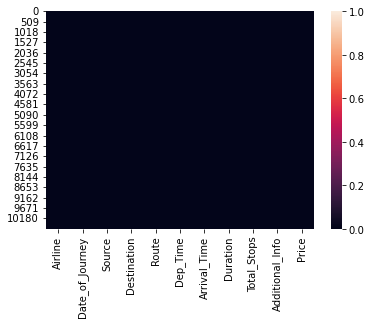

In [12]:
sns.heatmap(df.isnull())

There are only 2 NaN values in the dataset.

In [13]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The only numerical column is the price, which is the target variable. It has high standard deviation due to the presence of outliers, since there is a massive difference between the 75th percentile and the 100th percentile.

In [14]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

There are 12 different airlines

44 different dates

5 source cities

6 destination cities

128 different routes taken by the flights

222 different departure times

1343 different arrival times

368 different durations of flights

5 different stop amounts

10 types of additional info

1870 different prices of flights

In [15]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [16]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [17]:
df.corr()

,Price
Price,1.0


In [18]:
df.skew()

Price    1.812552
dtype: float64

Since the price column is the only numerical column, we only see skewness in it.

<AxesSubplot:>

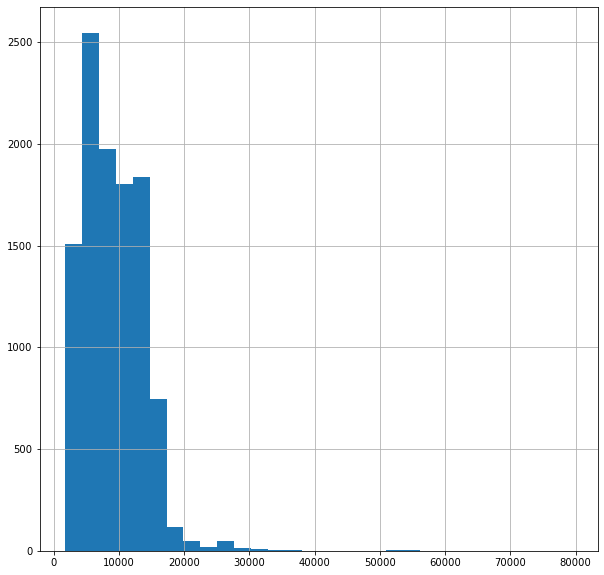

In [19]:
df['Price'].hist(figsize=(10,10), bins=30)

The distribution is mostly normal, but there are some outliers, skewing the distribution.

<AxesSubplot:xlabel='Price'>

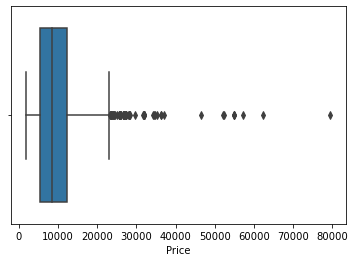

In [20]:
sns.boxplot(df['Price'])

There are some outliers which are skewing the data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

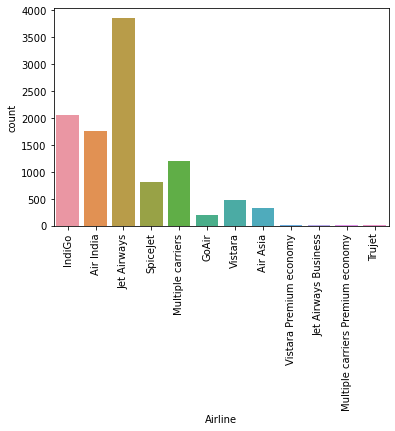

In [21]:
sns.countplot(df['Airline'])
plt.xticks(rotation=90)

Maximum flights were with the airline Jet Airways. Second majority of flights with Indigo. Least flights were with Vistara premium economy, jet airways business, multiple carriers premium economy and trujet.

<AxesSubplot:xlabel='Source', ylabel='count'>

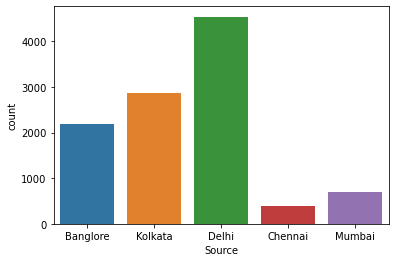

In [22]:
sns.countplot(df['Source'])

Maximum flights originated from Delhi, and least from Chennai.

<AxesSubplot:xlabel='Destination', ylabel='count'>

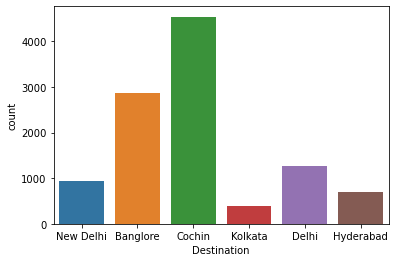

In [23]:
sns.countplot(df['Destination'])

Most flights' destination was Cochin, and least flights' destination was Kolkata. Bangalore was the second most common destination.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

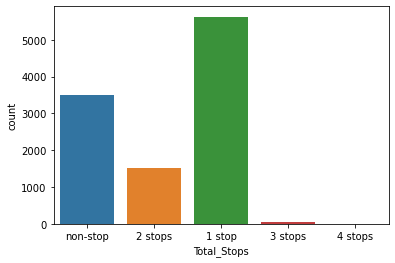

In [24]:
sns.countplot(df['Total_Stops'])

Maximum flights had 1 stop, and second majority is of non-stop flights. Least flights had 4 stops.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

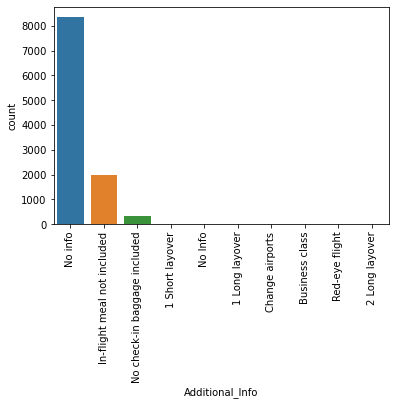

In [25]:
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=90)

Maximum flights had no additional info, and second majority had inflight meal not included. All other columns have negligible amount of info.

# Bivariate Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

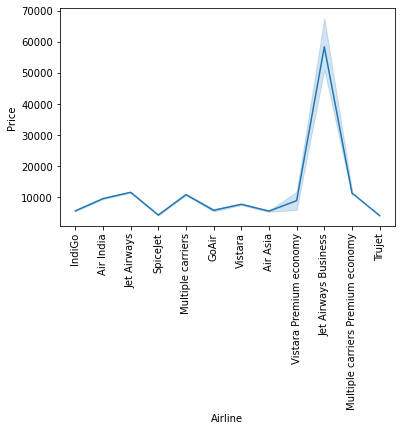

In [26]:
sns.lineplot(df['Airline'], df['Price'])
plt.xticks(rotation=90)

Highest price was with Jet Airways Business, and the other premium airlines. Indigo, Spicejet and Trujet had the lowest prices

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

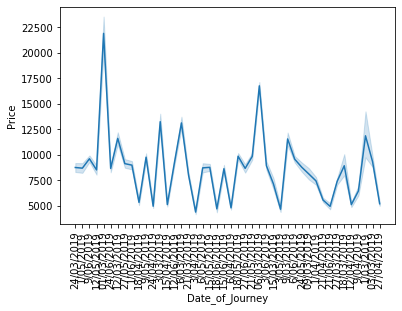

In [27]:
sns.lineplot(df['Date_of_Journey'], df['Price'])
plt.xticks(rotation=90)

Highest prices were on 1st march 2019 and 6th march 2019.

<AxesSubplot:xlabel='Source', ylabel='Price'>

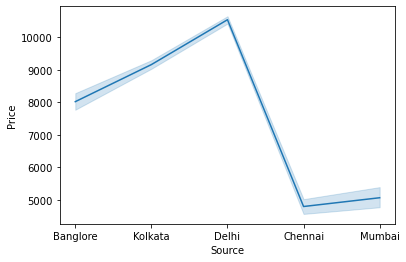

In [28]:
sns.lineplot(df['Source'], df['Price'])

Highest prices were for the flight's with source Delhi, Kolkata and Bangalore, and lowest prices were of flight's with source Chennai and Mumbai.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

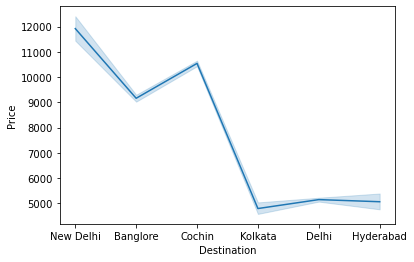

In [29]:
sns.lineplot(df['Destination'], df['Price'])

Flights with destination New Delhi had the highest prices, followed by flights with destination Cochin. Flights to Kolkata and Hyderabad had the lowest prices.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

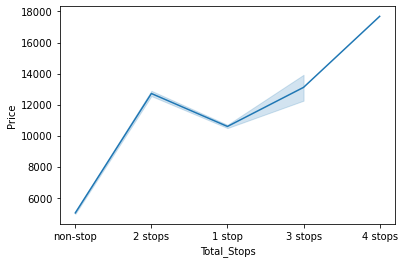

In [30]:
sns.lineplot(df['Total_Stops'], df['Price'])

Non stop flights had the lowest prices, followed by flights with 1 stop. Flights with 4 stops had the highest prices.

# Feature engineering

# Imputing + Dropping NaN values

In [31]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [32]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


We have neither route nor total_stops so we will drop this row, as imputing with mode might affect the learning of the model

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

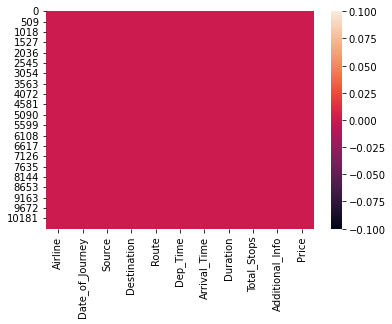

In [35]:
sns.heatmap(df.isnull())

There are no more null values in the data frame.

# Combining repeating values in columns

In [36]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Delhi appears twice in the Destination column, even though it is the same city. So we will include Delhi in New Delhi to have one category.

In [37]:
df.loc[df['Destination'] == 'Delhi', 'Destination'] = 'New Delhi'

In [38]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

Delhi has been included in the New Delhi category now.

In [39]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

No info appears twice in the additional_info column due to difference in the upper and lower case i. We will include them in one category.

In [40]:
df.loc[df['Additional_Info'] == 'No Info', 'Additional_Info'] = 'No info'

In [41]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

No Info has been merged with No info now.

# Customising date column for further analysis

In [42]:
dates = []
for i in df['Date_of_Journey']:
    if len(i) < 10:
        inn = '0' + i
        dates.append(inn)
    else:
        inn = i
        dates.append(inn)

In [43]:
len(dates)

10682

In [44]:
dates

['24/03/2019',
 '01/05/2019',
 '09/06/2019',
 '12/05/2019',
 '01/03/2019',
 '24/06/2019',
 '12/03/2019',
 '01/03/2019',
 '12/03/2019',
 '27/05/2019',
 '01/06/2019',
 '18/04/2019',
 '24/06/2019',
 '09/05/2019',
 '24/04/2019',
 '03/03/2019',
 '15/04/2019',
 '12/06/2019',
 '12/06/2019',
 '27/05/2019',
 '06/03/2019',
 '21/03/2019',
 '03/04/2019',
 '01/05/2019',
 '06/05/2019',
 '09/06/2019',
 '01/06/2019',
 '15/05/2019',
 '18/06/2019',
 '15/06/2019',
 '18/06/2019',
 '01/05/2019',
 '06/04/2019',
 '15/06/2019',
 '18/05/2019',
 '27/06/2019',
 '21/05/2019',
 '18/05/2019',
 '06/03/2019',
 '03/06/2019',
 '21/05/2019',
 '15/03/2019',
 '18/05/2019',
 '06/05/2019',
 '21/03/2019',
 '24/03/2019',
 '27/05/2019',
 '03/05/2019',
 '15/05/2019',
 '27/06/2019',
 '09/03/2019',
 '01/05/2019',
 '24/03/2019',
 '18/06/2019',
 '03/04/2019',
 '24/03/2019',
 '01/03/2019',
 '06/03/2019',
 '06/05/2019',
 '06/03/2019',
 '06/06/2019',
 '03/04/2019',
 '03/06/2019',
 '15/05/2019',
 '24/05/2019',
 '24/06/2019',
 '24/04/20

In [45]:
df['Date_of_Journey'] = dates

In [46]:
df['Date_of_Journey']

0        24/03/2019
1        01/05/2019
2        09/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678    09/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682    09/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [47]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Now the date values are uniform.

# Creating month column

In [48]:
df['Month'] = [int(x[3:5]) for x in df['Date_of_Journey']]

In [49]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


Now we have a month column containing the month in which the flight took place 

<AxesSubplot:xlabel='Month', ylabel='count'>

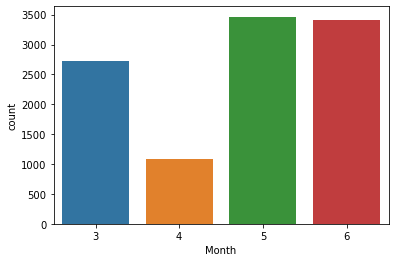

In [50]:
sns.countplot(df['Month'])

Least flights took place in April, and most in May.

<AxesSubplot:xlabel='Month', ylabel='Price'>

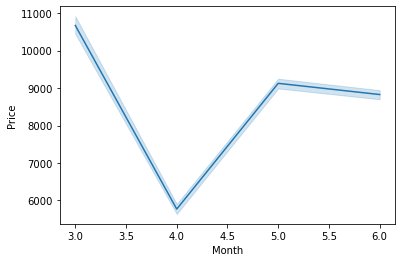

In [51]:
sns.lineplot(df['Month'], df['Price'])

Highest prices are in march, least in April. This can be explained by the lower volume of flights in April that we can see above.

# Creating weekend column

In [52]:
df['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [53]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '01/05/2019', '09/06/2019', '12/05/2019',
       '01/03/2019', '24/06/2019', '12/03/2019', '27/05/2019',
       '01/06/2019', '18/04/2019', '09/05/2019', '24/04/2019',
       '03/03/2019', '15/04/2019', '12/06/2019', '06/03/2019',
       '21/03/2019', '03/04/2019', '06/05/2019', '15/05/2019',
       '18/06/2019', '15/06/2019', '06/04/2019', '18/05/2019',
       '27/06/2019', '21/05/2019', '03/06/2019', '15/03/2019',
       '03/05/2019', '09/03/2019', '06/06/2019', '24/05/2019',
       '01/04/2019', '21/04/2019', '21/06/2019', '27/03/2019',
       '18/03/2019', '12/04/2019', '09/04/2019', '27/04/2019'],
      dtype=object)

In [54]:
df = df.sort_values(by = 'Month')

In [55]:
weekend=[]
for i in df.loc[df['Month'] == 3, 'Date_of_Journey']:
    if i[0:2] == '01' or i[0:2] == '02' or i[0:2] == '03' or i[0:2] == '08' or i[0:2] == '09' or i[0:2] == '10' or i[0:2] == '15' or i[0:2] == '16' or i[0:2] == '17' or i[0:2] == '22' or i[0:2] == '23' or i[0:2] == '24' or i[0:2] == '29' or i[0:2] == '30' or i[0:2] == '31':
        weekend.append('Yes')
    else:
        weekend.append('No')
            
for i in df.loc[df['Month'] == 4, 'Date_of_Journey']:
    if i[0:2] == '5' or i[0:2] == '6' or i[0:2] == '7' or i[0:2] == '12' or i[0:2] == '13' or i[0:2] == '14' or i[0:2] == '19' or i[0:2] == '20' or i[0:2] == '21' or i[0:2] == '26' or i[0:2] == '27' or i[0:2] == '28':
        weekend.append('Yes')
    else:
        weekend.append('No')
            
for i in df.loc[df['Month'] == 5, 'Date_of_Journey']:
    if i[0:2] == '3' or i[0:2] == '4' or i[0:2] == '5' or i[0:2] == '10' or i[0:2] == '11' or i[0:2] == '12' or i[0:2] == '17' or i[0:2] == '18' or i[0:2] == '19' or i[0:2] == '24' or i[0:2] == '25' or i[0:2] == '26' or i[0:2] == '31':
        weekend.append('Yes')
    else:
        weekend.append('No')

for i in df.loc[df['Month'] == 6, 'Date_of_Journey']:
    if i[0:2] == '1' or i[0:2] == '2' or i[0:2] == '7' or i[0:2] == '8' or i[0:2] == '9' or i[0:2] == '14' or i[0:2] == '15' or i[0:2] == '16' or i[0:2] == '21' or i[0:2] == '22' or i[0:2] == '23' or i[0:2] == '28' or i[0:2] == '29' or i[0:2] == '30':
        weekend.append('Yes')
    else:
        weekend.append('No')

In [56]:
df['Weekend'] = weekend

In [57]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,Yes
4698,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,12:00 25 Mar,27h 35m,1 stop,No info,13759,3,Yes
2487,SpiceJet,27/03/2019,Kolkata,Banglore,CCU → BLR,17:15,19:45,2h 30m,non-stop,No info,3847,3,No
8272,Air India,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:50,15:15,6h 25m,1 stop,No info,8714,3,Yes
2489,Jet Airways,06/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 07 Mar,20h 25m,1 stop,In-flight meal not included,13843,3,No


Now we have a column that tells us whether the flight was during the weekend or not.

<AxesSubplot:xlabel='Weekend', ylabel='count'>

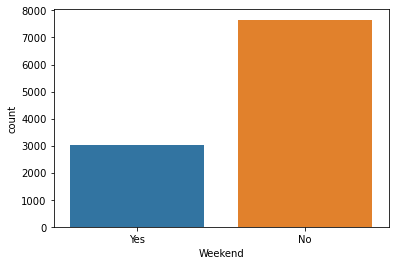

In [58]:
sns.countplot(df['Weekend'])

Maximum flights took place on weekdays.

<AxesSubplot:xlabel='Weekend', ylabel='Price'>

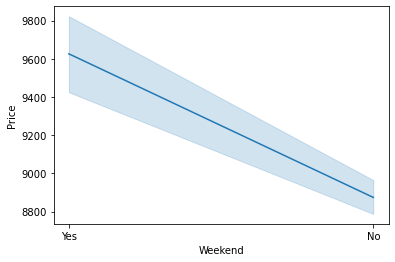

In [59]:
sns.lineplot(df['Weekend'], df['Price'])

Now we know that prices are much higher on weekends than they are on weekdays.

# Using departure time column to create time_of_day column

In [60]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Weekend
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,Yes
4698,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,12:00 25 Mar,27h 35m,1 stop,No info,13759,3,Yes
2487,SpiceJet,27/03/2019,Kolkata,Banglore,CCU → BLR,17:15,19:45,2h 30m,non-stop,No info,3847,3,No
8272,Air India,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:50,15:15,6h 25m,1 stop,No info,8714,3,Yes
2489,Jet Airways,06/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 07 Mar,20h 25m,1 stop,In-flight meal not included,13843,3,No


In [61]:
hour = []
for i in df['Dep_Time']:
    min = int(i[3:5])
    if min <= 30:
        hour.append(int(i[0:2]))
    else:
        hour.append(int(i[0:2])+1)

In [62]:
for i in hour:
    if i == 24:
        i = 0

In [63]:
df['hour_of_day'] = hour

Now we have the hour of day in which the flights departed. We can see if time of departure has any effect on price.

<AxesSubplot:xlabel='hour_of_day', ylabel='Price'>

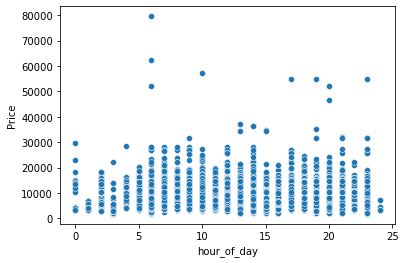

In [64]:
sns.scatterplot(df['hour_of_day'], df['Price'])

Now we can clearly see that prices are lowest during early morning and highest during business hours.

# Dropping unnecessary columns

In [65]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Weekend,hour_of_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,Yes,22
4698,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,12:00 25 Mar,27h 35m,1 stop,No info,13759,3,Yes,8
2487,SpiceJet,27/03/2019,Kolkata,Banglore,CCU → BLR,17:15,19:45,2h 30m,non-stop,No info,3847,3,No,17
8272,Air India,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:50,15:15,6h 25m,1 stop,No info,8714,3,Yes,9
2489,Jet Airways,06/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 07 Mar,20h 25m,1 stop,In-flight meal not included,13843,3,No,8


Now that we have dates sorted into months and weekend, we can remove the date column.

We can also remove route column as the total stops covers all the info it contains. We can also remove dep_time and arrival_time as duration and hour of day covers that information.

In [66]:
df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [67]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Weekend,hour_of_day
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,Yes,22
4698,Jet Airways,Kolkata,Banglore,27h 35m,1 stop,No info,13759,3,Yes,8
2487,SpiceJet,Kolkata,Banglore,2h 30m,non-stop,No info,3847,3,No,17
8272,Air India,Banglore,New Delhi,6h 25m,1 stop,No info,8714,3,Yes,9
2489,Jet Airways,Delhi,Cochin,20h 25m,1 stop,In-flight meal not included,13843,3,No,8


# Convert duration column to numerical type

In [68]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)

df['duration_in_mins'] = h.add(m, fill_value=0).astype(int)

In [69]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Weekend,hour_of_day,duration_in_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,Yes,22,170
4698,Jet Airways,Kolkata,Banglore,27h 35m,1 stop,No info,13759,3,Yes,8,1655
2487,SpiceJet,Kolkata,Banglore,2h 30m,non-stop,No info,3847,3,No,17,150
8272,Air India,Banglore,New Delhi,6h 25m,1 stop,No info,8714,3,Yes,9,385
2489,Jet Airways,Delhi,Cochin,20h 25m,1 stop,In-flight meal not included,13843,3,No,8,1225


In [70]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Month                int64
Weekend             object
hour_of_day          int64
duration_in_mins     int32
dtype: object

Now the duration is in minutes and converted to integer so we can view it's effect on flight prices easily.

We can drop the original duration column now.

In [71]:
df.drop('Duration', axis=1, inplace=True)

In [72]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Weekend,hour_of_day,duration_in_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,Yes,22,170
4698,Jet Airways,Kolkata,Banglore,1 stop,No info,13759,3,Yes,8,1655
2487,SpiceJet,Kolkata,Banglore,non-stop,No info,3847,3,No,17,150
8272,Air India,Banglore,New Delhi,1 stop,No info,8714,3,Yes,9,385
2489,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,13843,3,No,8,1225


<AxesSubplot:xlabel='duration_in_mins', ylabel='Price'>

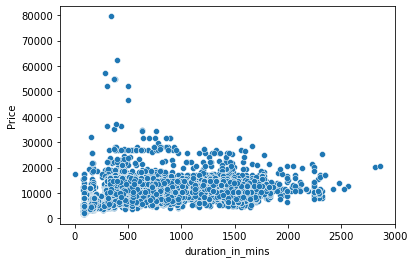

In [73]:
sns.scatterplot(df['duration_in_mins'], df['Price'])

There is not much correlation between the duration of the flight and the price.

# Converting total stops to int type

In [74]:
df['Total_Stops'].unique()

array(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [75]:
df.loc[df['Total_Stops'] == 'non-stop', 'total_stops'] = 0
df.loc[df['Total_Stops'] == '1 stop', 'total_stops'] = 1
df.loc[df['Total_Stops'] == '2 stops', 'total_stops'] = 2
df.loc[df['Total_Stops'] == '3 stops', 'total_stops'] = 3
df.loc[df['Total_Stops'] == '4 stops', 'total_stops'] = 4

In [76]:
df['total_stops'].unique()

array([0., 1., 2., 3., 4.])

In [77]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Weekend,hour_of_day,duration_in_mins,total_stops
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,Yes,22,170,0.0
4698,Jet Airways,Kolkata,Banglore,1 stop,No info,13759,3,Yes,8,1655,1.0
2487,SpiceJet,Kolkata,Banglore,non-stop,No info,3847,3,No,17,150,0.0
8272,Air India,Banglore,New Delhi,1 stop,No info,8714,3,Yes,9,385,1.0
2489,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,13843,3,No,8,1225,1.0


In [78]:
df['total_stops'] = df['total_stops'].astype(int)

In [79]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Weekend,hour_of_day,duration_in_mins,total_stops
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,Yes,22,170,0
4698,Jet Airways,Kolkata,Banglore,1 stop,No info,13759,3,Yes,8,1655,1
2487,SpiceJet,Kolkata,Banglore,non-stop,No info,3847,3,No,17,150,0
8272,Air India,Banglore,New Delhi,1 stop,No info,8714,3,Yes,9,385,1
2489,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,13843,3,No,8,1225,1


Now the total stops column is integer type. We will drop the original total_stops column

In [80]:
df.drop('Total_Stops', axis=1, inplace=True)

<AxesSubplot:xlabel='total_stops', ylabel='Price'>

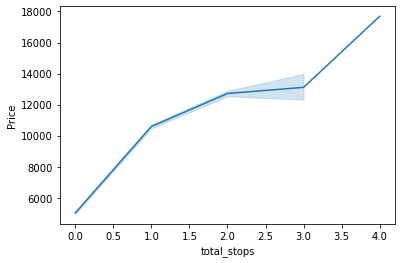

In [81]:
sns.lineplot(df['total_stops'], df['Price'])

There is high positive correlation between Price and the total stops of the flight. The greater the number of stops, the higher the price.

# Skewness

In [82]:
df.skew()

Price               1.812405
Month              -0.387409
hour_of_day         0.116619
duration_in_mins    0.861411
total_stops         0.317109
dtype: float64

There is only skewness in the price column and we cannot remove it since it is the target column.

# Encoding object type columns

In [83]:
df.dtypes

Airline             object
Source              object
Destination         object
Additional_Info     object
Price                int64
Month                int64
Weekend             object
hour_of_day          int64
duration_in_mins     int32
total_stops          int32
dtype: object

In [84]:
le = LabelEncoder()
list1 = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Weekend']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [85]:
df.dtypes

Airline             int32
Source              int32
Destination         int32
Additional_Info     int32
Price               int64
Month               int64
Weekend             int32
hour_of_day         int64
duration_in_mins    int32
total_stops         int32
dtype: object

Now all columns are numerical type.

# Removing outliers

In [86]:
z = np.abs(zscore(df))

print(np.where(z > 3))

(array([    8,     8,    24,    94,    96,    96,    97,   123,   127,
         139,   148,   162,   192,   215,   238,   267,   270,   283,
         315,   341,   346,   352,   354,   394,   403,   409,   409,
         424,   430,   446,   449,   504,   512,   517,   527,   539,
         547,   577,   586,   586,   592,   598,   598,   614,   635,
         661,   696,   712,   743,   759,   778,   786,   800,   804,
         816,   825,   847,   848,   878,   915,   915,   951,   969,
         972,  1004,  1004,  1145,  1157,  1188,  1188,  1205,  1211,
        1264,  1264,  1269,  1269,  1274,  1274,  1279,  1288,  1291,
        1330,  1338,  1341,  1343,  1374,  1374,  1404,  1422,  1422,
        1455,  1469,  1471,  1473,  1484,  1520,  1520,  1527,  1536,
        1538,  1557,  1596,  1597,  1598,  1635,  1651,  1688,  1705,
        1717,  1717,  1735,  1738,  1750,  1754,  1755,  1772,  1780,
        1786,  1796,  1821,  1821,  1826,  1828,  1828,  1830,  1849,
        1861,  1861

In [87]:
df.shape

(10682, 10)

In [88]:
df = df[(z<3).all(axis=1)]

In [89]:
df.shape

(10474, 10)

There are no more outliers in the data set.

# Checking multi-collinearity with Variance Inflation Factor

In [90]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [91]:
vif_calc()

,variables,VIF FACTOR
0,Airline,3.914506
1,Source,10.856025
2,Destination,6.650364
3,Additional_Info,35.897651
4,Price,11.290548
5,Month,16.347555
6,Weekend,1.479952
7,hour_of_day,5.890012
8,duration_in_mins,6.033065
9,total_stops,7.908936


<AxesSubplot:>

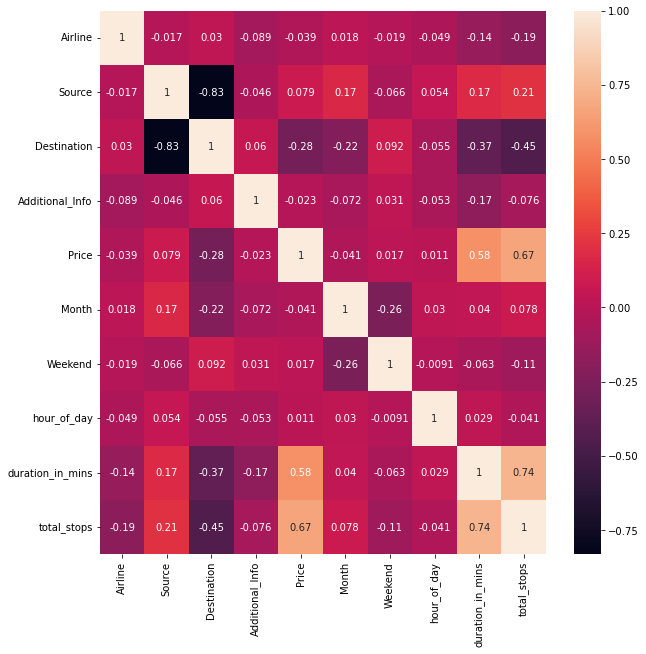

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

There is only some correlation between duration and total stops. We do not need to drop any columns here.

# Applying changes to test set

In [93]:
df_test.dropna(inplace=True)

In [94]:
df_test.loc[df_test['Destination'] == 'Delhi', 'Destination'] = 'New Delhi'
df_test.loc[df_test['Additional_Info'] == 'No Info', 'Additional_Info'] = 'No info'

In [95]:
dates = []
for i in df_test['Date_of_Journey']:
    if len(i) < 10:
        inn = '0' + i
        dates.append(inn)
    else:
        inn = i
        dates.append(inn)
df_test['Date_of_Journey'] = dates        

In [96]:
df_test['Month'] = [int(x[3:5]) for x in df_test['Date_of_Journey']]
df_test = df_test.sort_values(by = 'Month')

In [97]:
weekend=[]
for i in df_test.loc[df_test['Month'] == 3, 'Date_of_Journey']:
    if i[0:2] == '01' or i[0:2] == '02' or i[0:2] == '03' or i[0:2] == '08' or i[0:2] == '09' or i[0:2] == '10' or i[0:2] == '15' or i[0:2] == '16' or i[0:2] == '17' or i[0:2] == '22' or i[0:2] == '23' or i[0:2] == '24' or i[0:2] == '29' or i[0:2] == '30' or i[0:2] == '31':
        weekend.append('Yes')
    else:
        weekend.append('No')
            
for i in df_test.loc[df_test['Month'] == 4, 'Date_of_Journey']:
    if i[0:2] == '5' or i[0:2] == '6' or i[0:2] == '7' or i[0:2] == '12' or i[0:2] == '13' or i[0:2] == '14' or i[0:2] == '19' or i[0:2] == '20' or i[0:2] == '21' or i[0:2] == '26' or i[0:2] == '27' or i[0:2] == '28':
        weekend.append('Yes')
    else:
        weekend.append('No')
            
for i in df_test.loc[df_test['Month'] == 5, 'Date_of_Journey']:
    if i[0:2] == '3' or i[0:2] == '4' or i[0:2] == '5' or i[0:2] == '10' or i[0:2] == '11' or i[0:2] == '12' or i[0:2] == '17' or i[0:2] == '18' or i[0:2] == '19' or i[0:2] == '24' or i[0:2] == '25' or i[0:2] == '26' or i[0:2] == '31':
        weekend.append('Yes')
    else:
        weekend.append('No')

for i in df_test.loc[df_test['Month'] == 6, 'Date_of_Journey']:
    if i[0:2] == '1' or i[0:2] == '2' or i[0:2] == '7' or i[0:2] == '8' or i[0:2] == '9' or i[0:2] == '14' or i[0:2] == '15' or i[0:2] == '16' or i[0:2] == '21' or i[0:2] == '22' or i[0:2] == '23' or i[0:2] == '28' or i[0:2] == '29' or i[0:2] == '30':
        weekend.append('Yes')
    else:
        weekend.append('No')
df_test['Weekend'] = weekend

In [98]:
hour = []
for i in df_test['Dep_Time']:
    min = int(i[3:5])
    if min <= 30:
        hour.append(int(i[0:2]))
    else:
        hour.append(int(i[0:2])+1)

In [99]:
for i in hour:
    if i == 24:
        i = 0

In [100]:
df_test['hour_of_day'] = hour

In [101]:
df_test.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [102]:
h = df_test['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df_test['Duration'].str.extract('(\d+)m', expand=False).astype(float)

df_test['duration_in_mins'] = h.add(m, fill_value=0).astype(int)

In [103]:
df_test.drop('Duration', axis=1, inplace=True)

In [104]:
df_test.loc[df_test['Total_Stops'] == 'non-stop', 'total_stops'] = 0
df_test.loc[df_test['Total_Stops'] == '1 stop', 'total_stops'] = 1
df_test.loc[df_test['Total_Stops'] == '2 stops', 'total_stops'] = 2
df_test.loc[df_test['Total_Stops'] == '3 stops', 'total_stops'] = 3
df_test.loc[df_test['Total_Stops'] == '4 stops', 'total_stops'] = 4
df_test['total_stops'] = df_test['total_stops'].astype(int)

In [105]:
df_test.drop('Total_Stops', axis=1, inplace=True)

In [106]:
df_test.head()

,Airline,Source,Destination,Additional_Info,Month,Weekend,hour_of_day,duration_in_mins,total_stops
632,IndiGo,Delhi,Cochin,No info,3,Yes,11,615,1
510,Air India,Delhi,Cochin,No info,3,No,5,2295,2
511,SpiceJet,Delhi,Cochin,No info,3,Yes,16,360,1
512,SpiceJet,Banglore,New Delhi,No info,3,Yes,20,170,0
1698,Multiple carriers,Delhi,Cochin,No info,3,Yes,13,490,1


In [107]:
le = LabelEncoder()
list1 = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Weekend']
for i in list1:
    df_test[i] = le.fit_transform(df_test[i].astype(str))

In [108]:
z = np.abs(zscore(df_test))
df_test = df_test[(z<3).all(axis=1)]

# Training and testing

### Splitting data for training and testing

### Moving price column to the end 

In [89]:
price = df['Price']
df.drop('Price', axis=1, inplace=True)
df['Price'] = price
df.head()

,Airline,Source,Destination,Additional_Info,Month,Weekend,hour_of_day,duration_in_mins,total_stops,Price
0,3,0,4,7,3,1,22,170,0,3897
4698,4,3,0,7,3,1,8,1655,1,13759
2487,8,3,0,7,3,0,17,150,0,3847
8272,1,0,4,7,3,1,9,385,1,8714
2489,4,2,1,5,3,0,8,1225,1,13843


In [90]:
x = df.iloc[:,0:-1]
x

,Airline,Source,Destination,Additional_Info,Month,Weekend,hour_of_day,duration_in_mins,total_stops
0,3,0,4,7,3,1,22,170,0
4698,4,3,0,7,3,1,8,1655,1
2487,8,3,0,7,3,0,17,150,0
8272,1,0,4,7,3,1,9,385,1
2489,4,2,1,5,3,0,8,1225,1
...,...,...,...,...,...,...,...,...,...
7563,0,3,0,7,6,0,20,150,0
3242,4,0,4,7,6,0,19,185,0
3241,4,3,0,7,6,0,10,435,1
3365,4,0,4,7,6,0,18,180,0


In [91]:
y = df.iloc[:,-1]
y

0        3897
4698    13759
2487     3847
8272     8714
2489    13843
        ...  
7563     4409
3242     8016
3241     8355
3365     8016
5340     7594
Name: Price, Length: 10474, dtype: int64

### Models

In [92]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knnr = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [93]:
models = [lr, ridge, lasso, en, knnr, svr, dtr, rfr]

### Finding best random state

In [94]:
best_random_state = 0
lowest_error = 10000000
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 8129284.297151209
At random score 1, mean squared error is 8212335.328472336
At random score 2, mean squared error is 8504302.457639169
At random score 3, mean squared error is 8196621.9846902415
At random score 4, mean squared error is 8307494.735384651
At random score 5, mean squared error is 8218871.200960801
At random score 6, mean squared error is 8613425.519642005
At random score 7, mean squared error is 8353671.207132245
At random score 8, mean squared error is 8236121.5297952965
At random score 9, mean squared error is 8174804.784731142
At random score 10, mean squared error is 8496787.891552778
At random score 11, mean squared error is 8184019.627651273
At random score 12, mean squared error is 8377333.112801603
At random score 13, mean squared error is 8396907.432879
At random score 14, mean squared error is 8095138.200277146
At random score 15, mean squared error is 8152815.397198736
At random score 16, mean squared error is 8273399.4

### Proceeding with random state 94

In [95]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=94)

In [96]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of 48.86471347122911% and a mean squared error of 7625793.32
Model Ridge() had training score of 48.86470563652513% and a mean squared error of 7625625.03
Model Lasso() had training score of 48.8646281178441% and a mean squared error of 7625149.65
Model ElasticNet() had training score of 41.2872681632965% and a mean squared error of 8671039.49
Model KNeighborsRegressor() had training score of 69.5201813487865% and a mean squared error of 4076464.46
Model SVR() had training score of 17.83504530538263% and a mean squared error of 11892668.77
Model DecisionTreeRegressor() had training score of 77.50087372954755% and a mean squared error of 3701151.5
Model RandomForestRegressor() had training score of 82.57430783023135% and a mean squared error of 2673503.57


### We will proceed with random forest regressor

In [71]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [72]:
grid = GridSearchCV(rfr, parameters, cv=5, n_jobs=-1)

In [73]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'poisson',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

### There are the parameters we will put in the model for final training and testing.

In [97]:
rfr = RandomForestRegressor(criterion='poisson', min_samples_leaf=2, min_samples_split=2, n_estimators=200)

In [98]:
rfr.fit(xtrain, ytrain)
pred = rfr.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rfr, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 83.2906194843308


In [99]:
print(f'The mean squared error is {mean_squared_error(ytest, pred)}')

The mean squared error is 2410085.242181907


In [102]:
print(f'The mean absolute error is {mean_absolute_error(ytest, pred)}')

The mean absolute error is 877.4372011889618


In [101]:
print(f'The r2 score is {r2_score(ytest, pred)}')

The r2 score is 0.8464599369043314


## Conclusion: Random Forest Regressor is the best model with cross val score of 83.29, r2 score of 84.65% and a mean absolute error of 877.

## We will test the test set now.

In [103]:
prediction = rfr.predict(df_test)
print(prediction)

[11890.78974206 12447.0098631   4589.15316468 ...  6939.399375
  4817.63602399  8875.02295292]


In [104]:
type(prediction)

numpy.ndarray

In [105]:
prediction = pd.DataFrame({'Price': prediction})

In [106]:
prediction

,Price
0,11890.789742
1,12447.009863
2,4589.153165
3,13290.567710
4,13466.855300
...,...
2635,4694.728990
2636,4227.089458
2637,6939.399375
2638,4817.636024


# Exporting the predicted data

In [87]:
file = 'Flight_Price_Prediction.xlsx'

In [88]:
prediction.to_excel(file)

# Saving the best model

In [107]:
import pickle
filename = 'flightprice.pkl'
pickle.dump(rfr, open(filename, 'wb'))